# 5x5 Grid World

In [1]:
import numpy as np
import random, os
import matplotlib.pyplot as plt
from tqdm import tqdm
from grid_world import *

Actions:
* 0 - Left
* 1 - Down
* 2 - Right
* 3 - Up

Agent Position:  1.1

## Environment


Size of the environment:  5
Observations in the environment:  25
Actions in the environment:  4

Reward grid: 
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Position grid: 
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.1 0.  0.  0.  0. ]]

Render: 


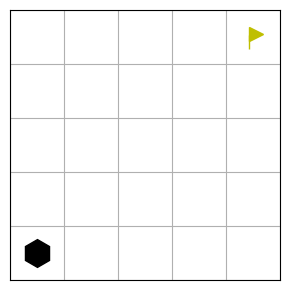

In [2]:
grid_world = GridWorld(size=5, noisyMoveChance=0.3, EnableNoise=True)

print('\nSize of the environment: ', grid_world.get_size())

print('Observations in the environment: ', grid_world.get_observations())

print('Actions in the environment: ', grid_world.get_available_moves())

print('\nReward grid: ')
grid_world.print_reward_grid()

print('Position grid: ')
grid_world.print_position_grid()

print('Render: ')
grid_world.render()


 Observation after a step (right): (x, y, state, reward, done)

 (4, 1, 21, 0.0, False)


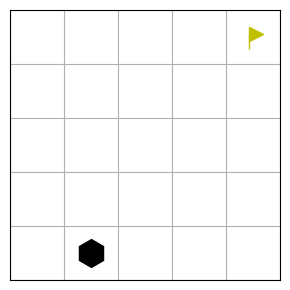

20

In [3]:
print('\n Observation after a step (right): (x, y, state, reward, done)\n\n',grid_world.step(2))
grid_world.render()

grid_world.reset()

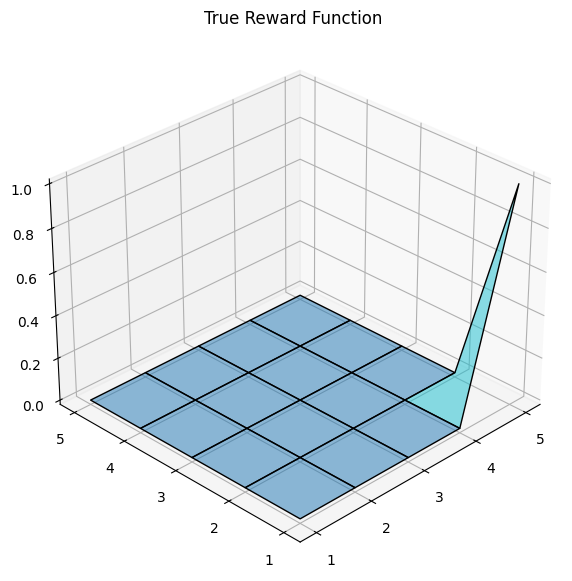

In [4]:
# plot true reward function

grid_world.plot_reward_function(grid_world.RewardGrid, 'True Reward Function', 
                     filename='../Results/Discrete Grid World/True Reward Function')

### Transition Probabilities

In [5]:
# Transition Probability Matrices

transition_matrix = grid_world.get_transition_matrix()
transition_matrix

array([[[0.85 , 0.075, 0.   , ..., 0.   , 0.   , 0.   ],
        [0.775, 0.075, 0.075, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.775, 0.075, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.075, 0.075, 0.   ],
        [0.   , 0.   , 0.   , ..., 0.775, 0.075, 0.075],
        [0.   , 0.   , 0.   , ..., 0.   , 0.775, 0.15 ]],

       [[0.15 , 0.075, 0.   , ..., 0.   , 0.   , 0.   ],
        [0.075, 0.075, 0.075, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.075, 0.075, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.775, 0.075, 0.   ],
        [0.   , 0.   , 0.   , ..., 0.075, 0.775, 0.075],
        [0.   , 0.   , 0.   , ..., 0.   , 0.075, 0.85 ]],

       [[0.15 , 0.775, 0.   , ..., 0.   , 0.   , 0.   ],
        [0.075, 0.075, 0.775, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.075, 0.075, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.075, 0.775, 0.   ],
        [0.   , 0.   , 0.   , ..., 0.075, 0.0

In [6]:
# 4 Transition Probability matrices for 4 actions
# Each with shape 25x25 since there are 25 states

transition_matrix.shape

(4, 25, 25)

## Train Expert (Q Learning)

Training agent for 20000 episodes..: 100%|█| 20000/20000 [00:04<00:00, 4715.43it


Q Table:

[[0.35518477 0.36509892 0.63807627 0.36973772]
 [0.3952647  0.42095293 0.74511374 0.42729166]
 [0.48507114 0.4626341  0.8179585  0.4752359 ]
 [0.54564527 0.54790253 0.94690965 0.55567623]
 [0.         0.         0.         0.        ]
 [0.32469616 0.31056168 0.3012025  0.57464748]
 [0.37878845 0.36228098 0.53363736 0.38624794]
 [0.41081884 0.41683572 0.42880131 0.73926928]
 [0.43372057 0.43891837 0.43522381 0.79199892]
 [0.39297615 0.38714818 0.40626053 0.99937192]
 [0.30747897 0.29002364 0.30817228 0.53955459]
 [0.33517777 0.33942561 0.32572705 0.48315853]
 [0.35789007 0.36575137 0.36949505 0.64327518]
 [0.50470503 0.37584556 0.38454196 0.39689738]
 [0.40766628 0.35423305 0.35333481 0.37282318]
 [0.24393693 0.23739684 0.24463329 0.46764801]
 [0.28076093 0.28648395 0.40711367 0.27611412]
 [0.31257173 0.30045474 0.30923608 0.51043962]
 [0.34059633 0.33617007 0.32823323 0.45440895]
 [0.37013216 0.31926474 0.32665542 0.30674885]
 [0.21253406 0.21292309 0.21518501 0.39711382]
 [0

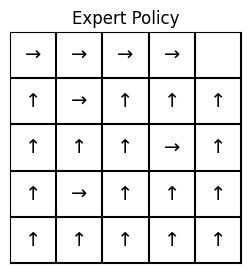

In [7]:
trainer = GridWorldTrainer(grid_world)

# Train the agent using Q learning
Q = trainer.train_agent(20000)
print('Q Table:\n')
trainer.print_q_table()

print('Policy Matrix:\n')
expert_policy = trainer.get_policy(trainer.Q)
trainer.print_policy_matrix()

print('\nPolicy Matrix with Directions:')
trainer.plot_policy_matrix(trainer.matrix, title='Expert Policy')


A Trajectory executed by Agent:


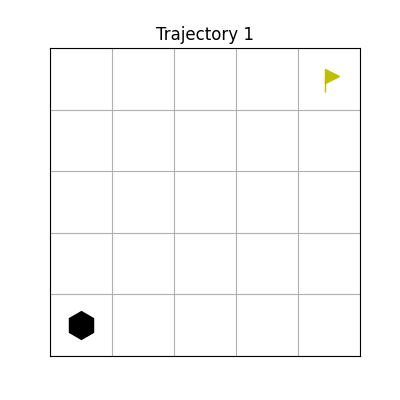

15 Trajectories executed by Agent:



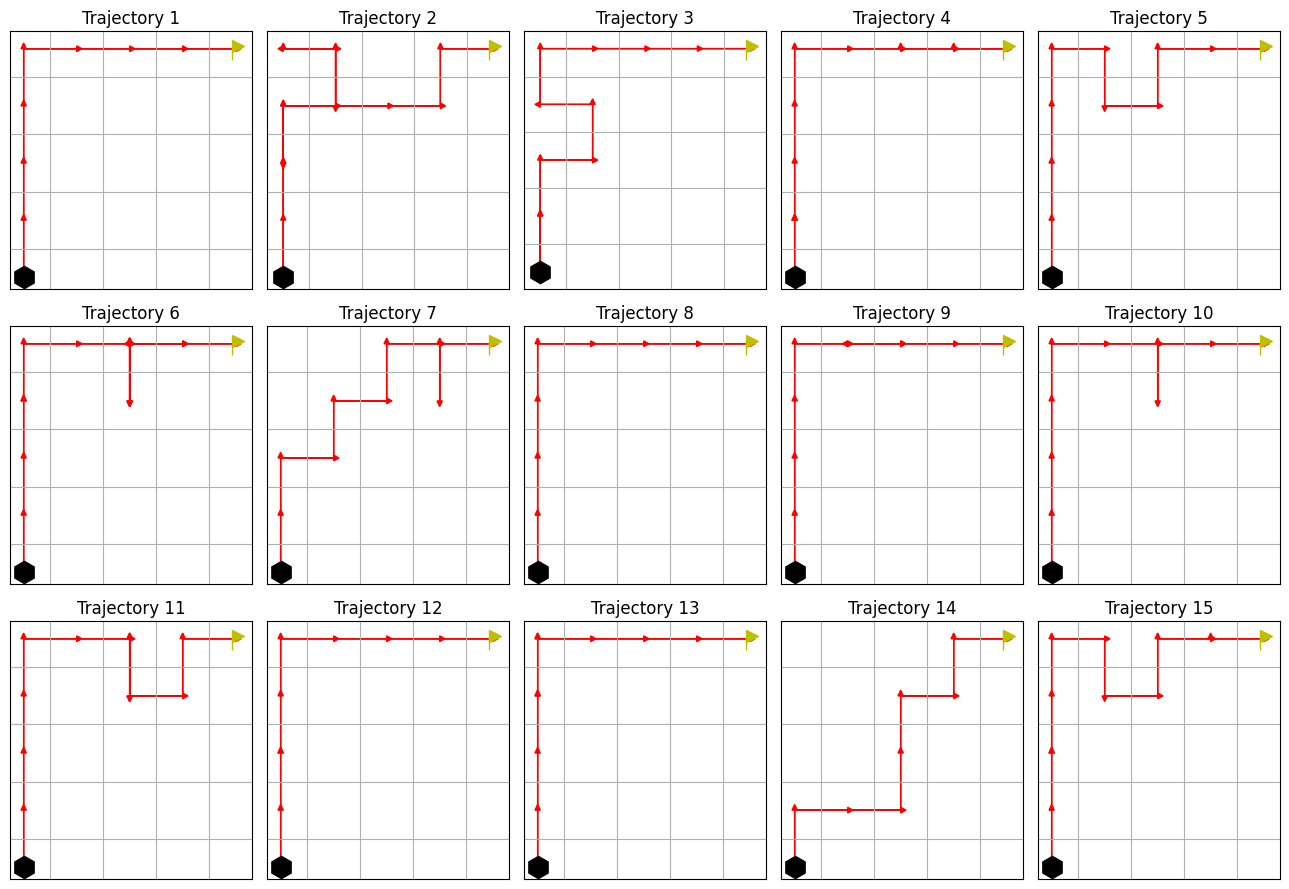

Saving rendered trajectories..: 100%|███████████| 15/15 [00:07<00:00,  1.95it/s]

In [8]:
num_trajectories = 15

print('\nA Trajectory executed by Agent:')
trainer.get_trajectories(trainer.matrix, num_trajectories)
trainer.render_trajectory(0, filename='../Results/Discrete Grid World/Agent Trajectory 01.gif', show=True)

print(f'{num_trajectories} Trajectories executed by Agent:\n')
trainer.visualize_trajectories(filename='../Results/Discrete Grid World/Agent Trajectories.png')

for trajectory in tqdm(range(len(trainer.Trajectories)), desc='Saving rendered trajectories..'):
    if trajectory+1<=9:
        trainer.render_trajectory(trajectory=trajectory, filename=f'../Results/Discrete Grid World/Agent Trajectory 0{trajectory+1}.gif')
    else:
        trainer.render_trajectory(trajectory=trajectory, filename=f'../Results/Discrete Grid World/Agent Trajectory {trajectory+1}.gif')

print('\n')

# Inverse Reinforcement Learning

## Linear Programing IRL Algorithm

In [9]:
from scipy.optimize import linprog    # for linear programming

In [10]:
def linear_programming_irl(transition_probabilities, optimal_policy, gamma=0.2, l1_penalty=1.05, max_reward=1.0):
    """
    Perform Inverse Reinforcement Learning using Linear Programming.

    Parameters:
    - transition_probabilities: ndarray, shape (n_actions, n_states, n_states)
        Transition probabilities for each action in each state.
        
    - optimal_policy: ndarray, shape (n_states,)
        Optimal policy for each state.
        
    - gamma: float, optional
        Discount factor.
        
    - l1_penalty: float, optional
        L1 regularization penalty.
        
    - max_reward: float, optional
        Maximum allowable reward.

    Returns:
    - rewards: ndarray, shape (n_states,)
        Inferred reward function.
    """

    n_actions, n_states, _ = transition_probabilities.shape
    action_set = set(range(n_actions))
    optimal_policy = optimal_policy.flatten()

    # function to calculate (Pa_1 - Pa) * (I - γ * Pa_1)^-1
    def eq_4(a, s):
        return np.dot(transition_probabilities[optimal_policy[s], s] - transition_probabilities[a, s],
                      np.linalg.inv(np.eye(n_states) - gamma * transition_probabilities[optimal_policy[s]]))

    # objective function coefficients
    c = -np.r_[np.zeros(n_states), np.ones(n_states), -l1_penalty * np.ones(n_states)]

    # matrices for inequality constraints
    zero_stack = np.zeros((n_states * (n_actions - 1), n_states))
    T_stack = np.vstack([-eq_4(a, s) for s in range(n_states) for a in action_set - {optimal_policy[s]}]) # stack of (Pa_1 - Pa) * (I - gamma * Pa_1)^-1 for all states and non optimal actions
    I_stack = np.vstack([np.eye(1, n_states, s) for s in range(n_states) for a in action_set - {optimal_policy[s]}]) # stack of matrices for l1 

    eyes = np.eye(n_states)
    zeroes = np.zeros((n_states, n_states))
    
    # optimisation problem with slack variables:
    # maximize:   ∑_{i ∈ S} {t_i - λu_i}
    
    # matrix A_ub for inequality constraints - LHS
    A_ub = np.bmat([[T_stack, I_stack, zero_stack],    # (P_{a_1}(i) - P_a(i)) (I - γP_{a_1}(i))^{-1} R ≥ t_i
                    [T_stack, zero_stack, zero_stack], # (P_{a_1}(i) - P_a(i)) (I - γP_{a_1}(i))^{-1} R ≥ 0
                    [-eyes, zeroes, -eyes],   # -u ≤ R
                    [eyes, zeroes, -eyes],    # R  ≤ u
                    [-eyes, zeroes, zeroes],  # -R ≤ max_reward
                    [eyes, zeroes, zeroes]])  # R ≤ max_reward

    # vector b for inequality constraints - RHS
    b = np.vstack([np.zeros((n_states * (n_actions - 1) * 2 + 2 * n_states, 1)),
                   max_reward * np.ones((2 * n_states, 1))])

    # solvin linear programming problem
    results = linprog(c, A_ub, b)

    rewards = results["x"][:n_states]
    return rewards

### Recover Reward Function

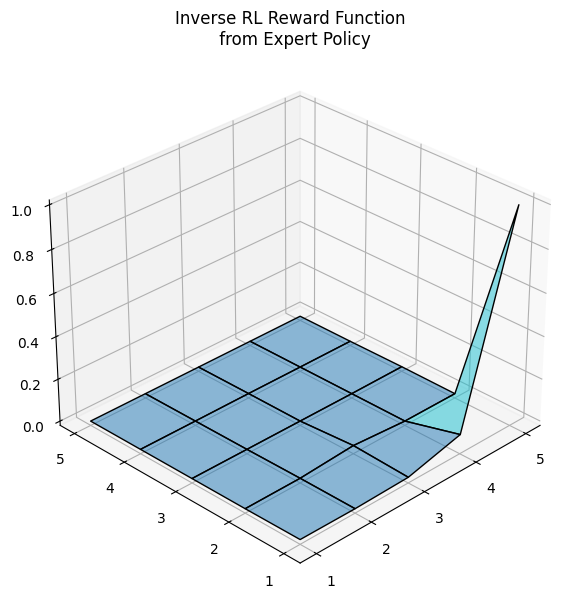

In [11]:
# Perform Inverse Reinforcement Learning to obtain reward function from Expert Optimal Policy

rewards = linear_programming_irl(transition_matrix, expert_policy, gamma=0.1, l1_penalty=1.05, max_reward=1)

grid_world.plot_reward_function(rewards, 'Inverse RL Reward Function \n from Expert Policy', 
                                filename='../Results/Discrete Grid World/Reward Function obtained from Expert')

## Given Policy

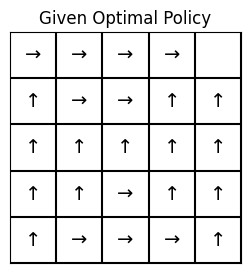

In [12]:
# 'Given' optimal policy (given in the paper)
optimal_policy = [[2, 2, 2, 2, 2],
                  [3, 2, 2, 3, 3],
                  [3, 3, 3, 3, 3],
                  [3, 3, 2, 3, 3],
                  [3, 2, 2, 2, 3]]

optimal_policy = np.array(optimal_policy)
trainer.plot_policy_matrix(optimal_policy, title='Given Optimal Policy')

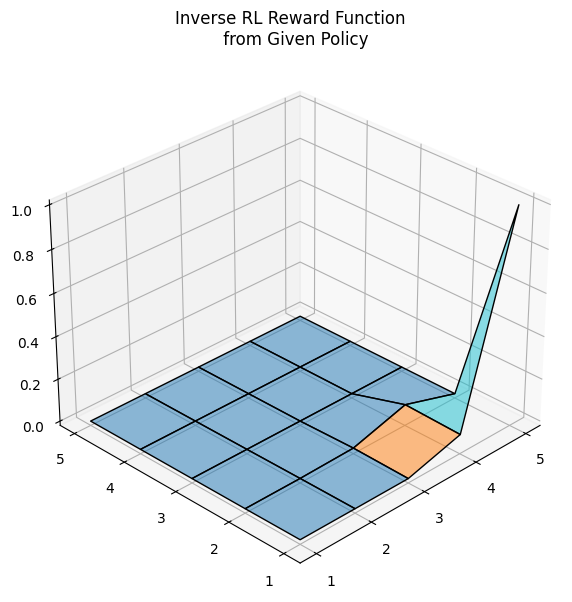

In [13]:
# Perform Inverse Reinforcement Learning to obtain reward function from Given Optimal Policy

rewards = linear_programming_irl(transition_matrix, optimal_policy, gamma=0.1, l1_penalty=1.05, max_reward=1)

grid_world.plot_reward_function(rewards, 'Inverse RL Reward Function \n from Given Policy', 
                                filename='../Results/Discrete Grid World/Reward Function obtained from given policy')